FRAUD DETECTION - COMPREHENSIVE FEATURE ANALYSIS

[1/8] Loading data...
Dataset shape: (1296675, 23)
Fraud rate: 0.579%

[2/8] Feature engineering...

COMPREHENSIVE FEATURE ENGINEERING
✓ Time features created: 17 features
✓ Age features created: age, age_group
✓ Geographic features created: distance_km, distance_category, same_state_area
✓ Amount features created: amt_log, amt_rounded, amt_category
✓ Categorical encodings created for: ['merchant', 'category', 'state', 'job', 'gender']
✓ Card-based aggregation features created
✓ Population features created
✓ Derived features created

✓ Total features after engineering: 68 columns

[3/8] Preparing data...
Features for modeling: 49 columns
Feature names: ['Unnamed: 0', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'trans_year', 'trans_month']... (showing first 10)

[4/8] Analyzing correlations...

CORRELATION ANALYSIS

Top 20 features correlated with is_fraud:
is_fraud                   1.000000
amt_deviation        

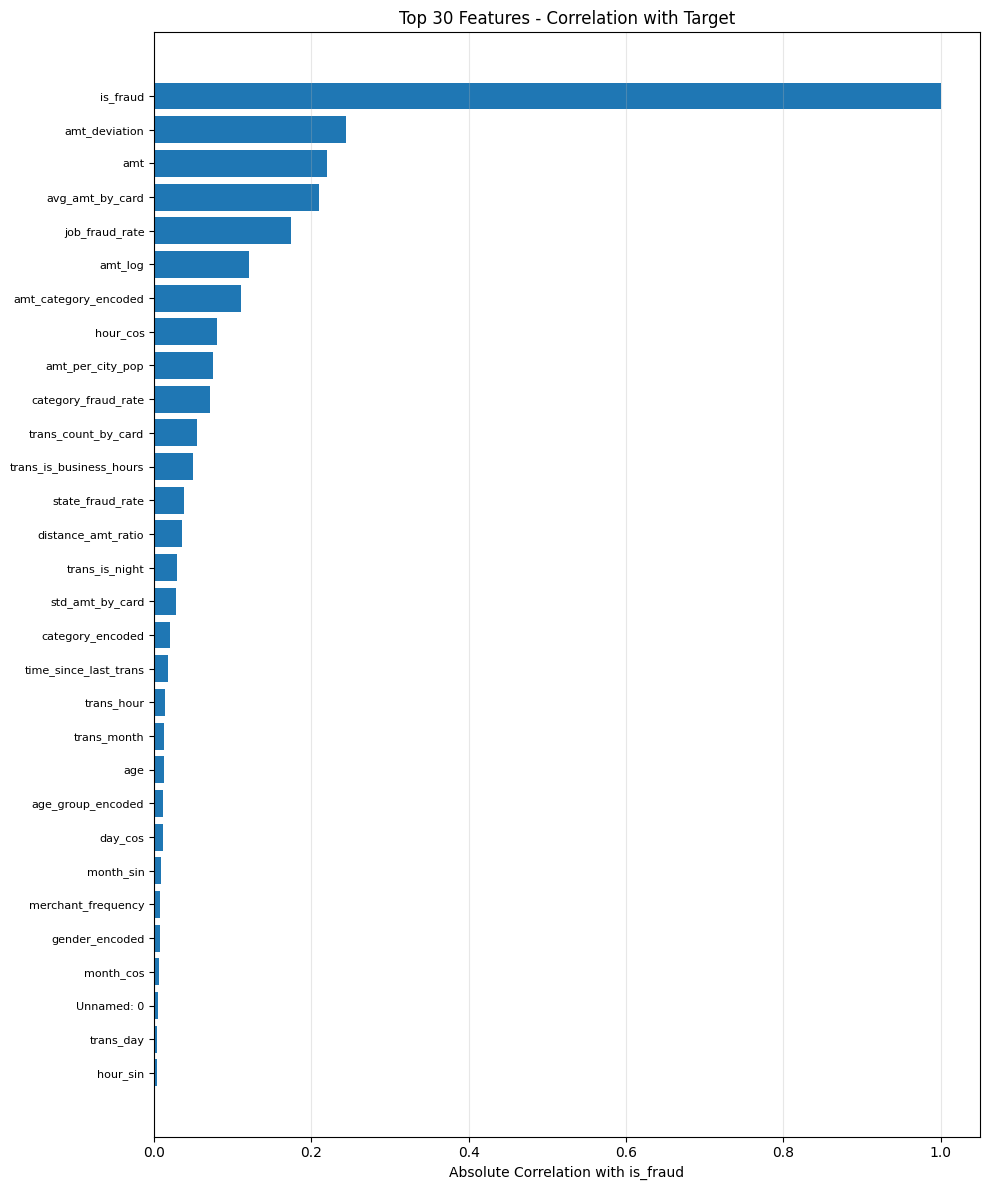

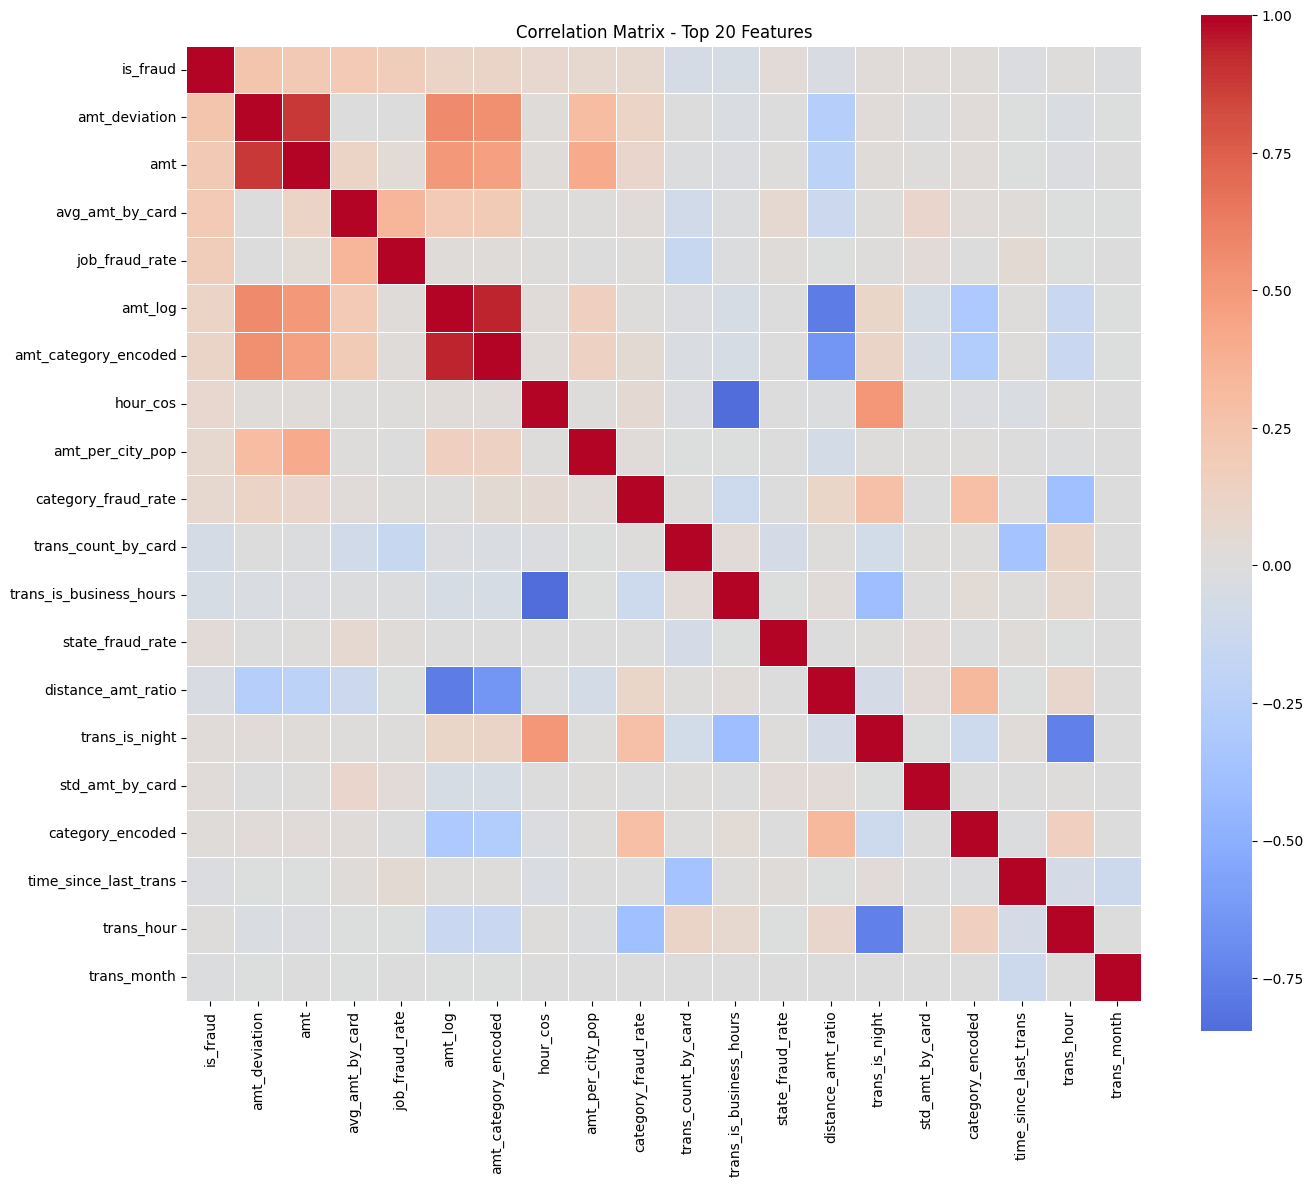


[5/8] Analyzing feature importance...

FEATURE IMPORTANCE ANALYSIS

[1/5] Random Forest Feature Importance...
[2/5] Gradient Boosting Feature Importance...
[3/5] XGBoost Feature Importance...
[4/5] Mutual Information...
[5/5] F-Score (ANOVA)...

✓ Feature importance saved to 'feature_importance_results.csv'

TOP 20 MOST IMPORTANT FEATURES
                  feature  avg_importance  rank
                      amt        0.750433     1
                 hour_cos        0.339759     2
            amt_deviation        0.334368     3
                  amt_log        0.301633     4
         category_encoded        0.286629     5
          same_state_area        0.250000     6
          avg_amt_by_card        0.219002     7
      category_fraud_rate        0.191922     8
               trans_year        0.167287     9
     amt_category_encoded        0.164490    10
               trans_hour        0.131114    11
           job_fraud_rate        0.129867    12
           gender_encoded        0

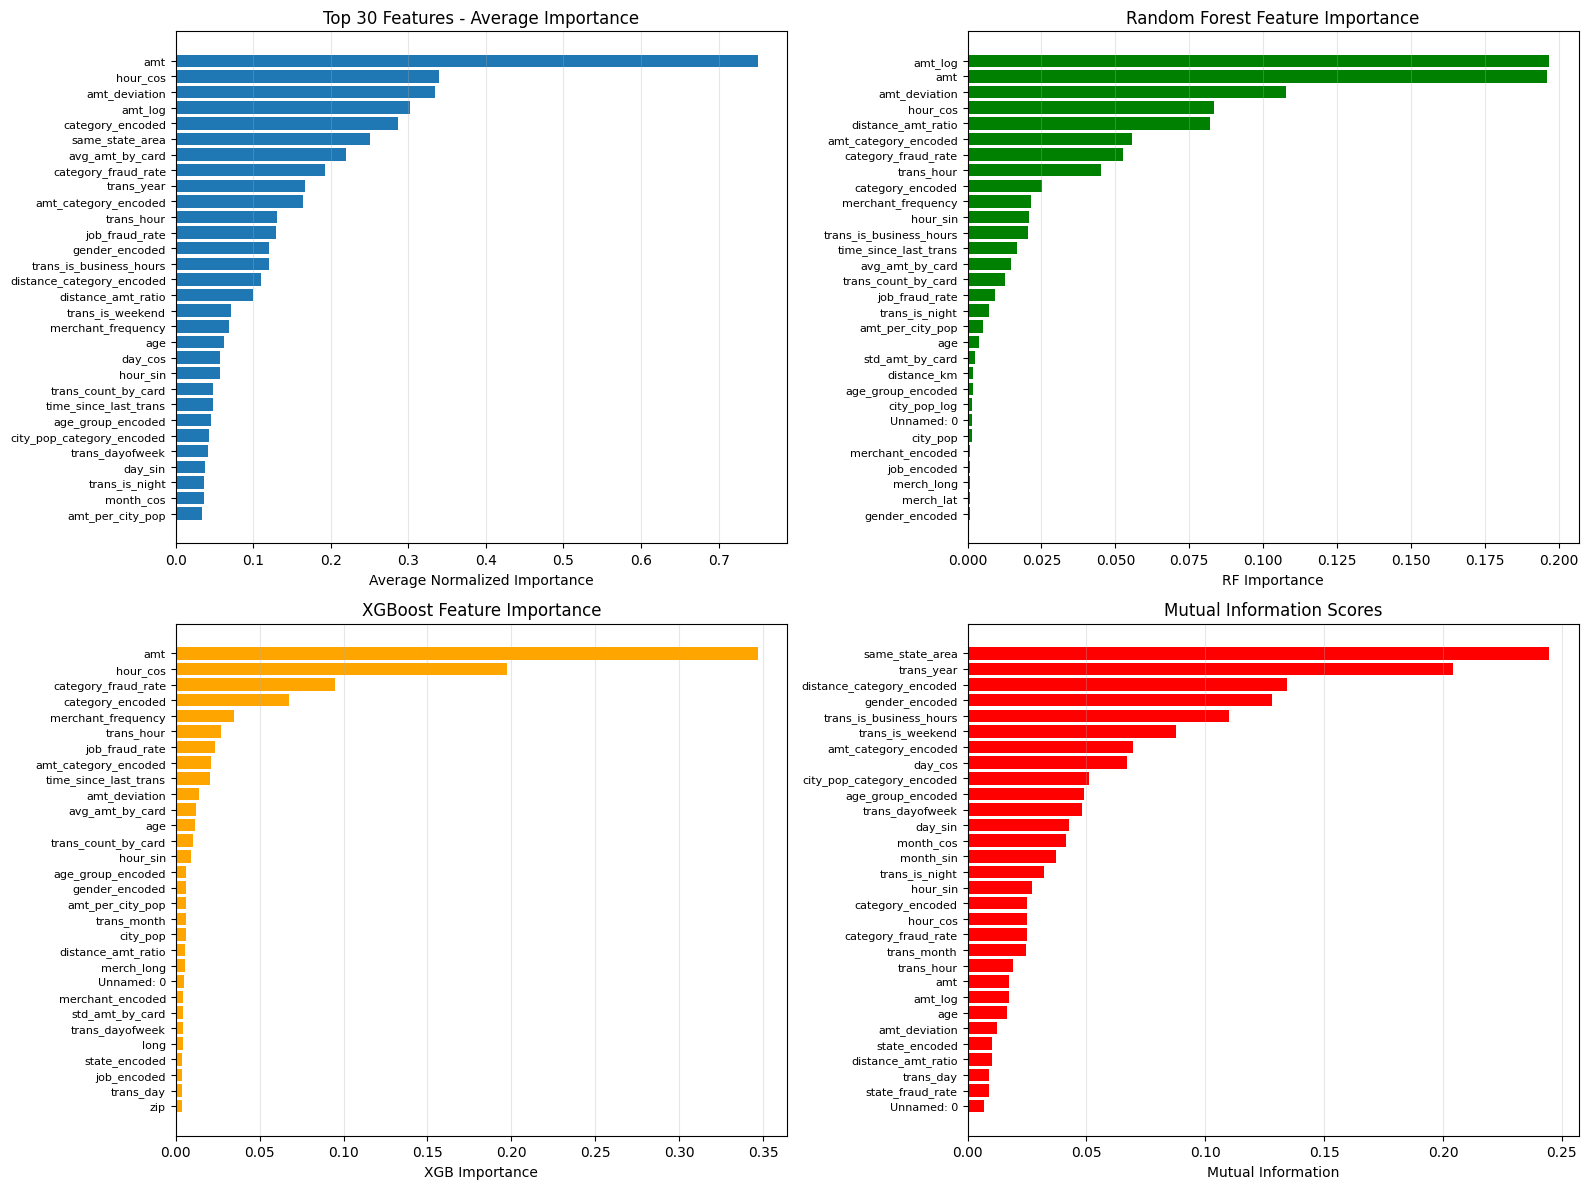


[7/8] Comparing different feature sets...

COMPARING MODELS WITH DIFFERENT FEATURE SETS

Feature Set: All Features (49 features)

  Training XGBoost...
    Precision: 0.4861, Recall: 0.9567, F1: 0.6447, ROC-AUC: 0.9988

  Training LightGBM...
    Precision: 0.6223, Recall: 0.8967, F1: 0.7347, ROC-AUC: 0.9970

  Training Random Forest...
    Precision: 0.2743, Recall: 0.9374, F1: 0.4244, ROC-AUC: 0.9940

Feature Set: Top 50 (49 features)

  Training XGBoost...
    Precision: 0.4785, Recall: 0.9640, F1: 0.6396, ROC-AUC: 0.9987

  Training LightGBM...
    Precision: 0.6223, Recall: 0.8967, F1: 0.7347, ROC-AUC: 0.9970

  Training Random Forest...
    Precision: 0.2684, Recall: 0.9360, F1: 0.4172, ROC-AUC: 0.9937

Feature Set: Top 30 (30 features)

  Training XGBoost...
    Precision: 0.4629, Recall: 0.9674, F1: 0.6261, ROC-AUC: 0.9972

  Training LightGBM...
    Precision: 0.5781, Recall: 0.9101, F1: 0.7070, ROC-AUC: 0.9971

  Training Random Forest...
    Precision: 0.2541, Recall: 0.956

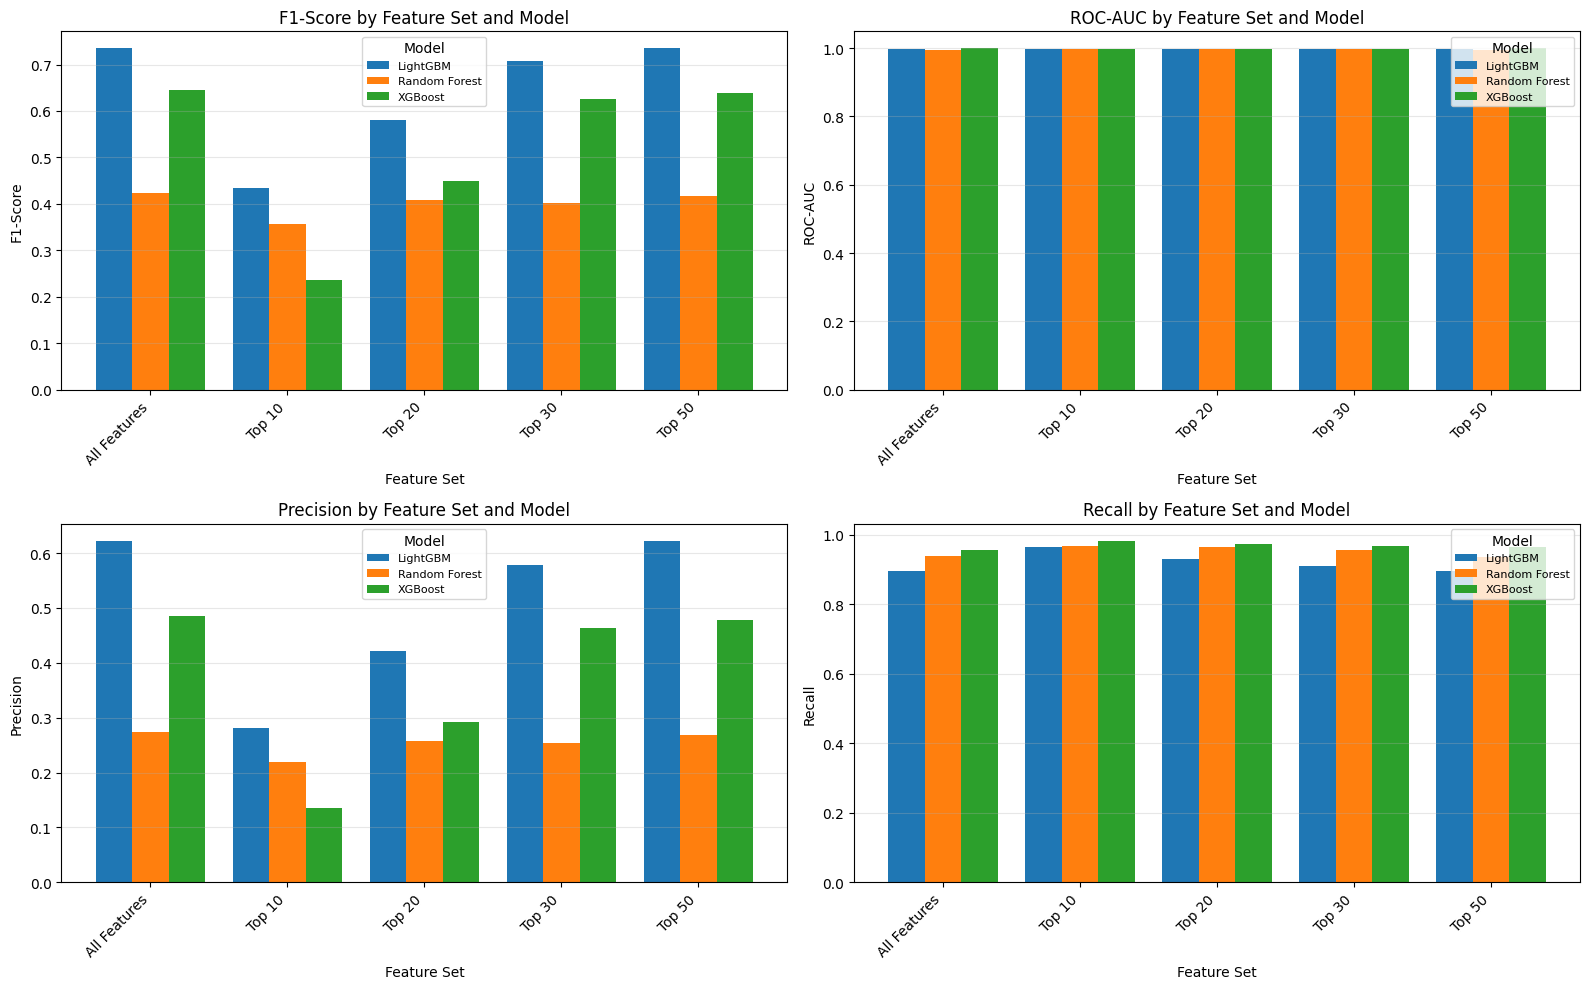


ANALYSIS COMPLETED!

Generated files:
  1. feature_importance_results.csv - Detailed feature importance scores
  2. feature_set_comparison_results.csv - Performance with different feature sets
  3. feature_importance_analysis.png - Feature importance visualizations
  4. correlation_with_target.png - Target correlation analysis
  5. feature_correlation_matrix.png - Feature correlation heatmap
  6. feature_set_comparison.png - Feature set performance comparison

KEY INSIGHTS

✓ Best performing configuration:
  - Feature Set: All Features (49 features)
  - Model: LightGBM
  - F1-Score: 0.7347
  - Precision: 0.6223
  - Recall: 0.8967

✓ Feature reduction analysis:
  - Average F1 with All Features: 0.6013
  - Average F1 with Top 30 Features: 0.5782
  - Performance change: -3.83%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, precision_recall_curve, auc,
                             f1_score, precision_score, recall_score)
from sklearn.feature_selection import (SelectKBest, f_classif, mutual_info_classif,
                                       RFE, RFECV)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier

# ============================================================================
# 1. COMPREHENSIVE FEATURE ENGINEERING
# ============================================================================

def comprehensive_feature_engineering(df):
    """Create extensive features without dropping original columns"""
    df = df.copy()
    
    print("\n" + "="*80)
    print("COMPREHENSIVE FEATURE ENGINEERING")
    print("="*80)
    
    # ========== TIME FEATURES ==========
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    
    # Basic time features
    df['trans_year'] = df['trans_date_trans_time'].dt.year
    df['trans_month'] = df['trans_date_trans_time'].dt.month
    df['trans_day'] = df['trans_date_trans_time'].dt.day
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['trans_minute'] = df['trans_date_trans_time'].dt.minute
    df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
    df['trans_is_weekend'] = df['trans_dayofweek'].isin([5, 6]).astype(int)
    df['trans_is_night'] = df['trans_hour'].isin(range(0, 6)).astype(int)
    df['trans_is_business_hours'] = df['trans_hour'].isin(range(9, 18)).astype(int)
    
    # Cyclical encoding for time
    df['hour_sin'] = np.sin(2 * np.pi * df['trans_hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['trans_hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['trans_dayofweek'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['trans_dayofweek'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['trans_month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['trans_month'] / 12)
    
    print(f"✓ Time features created: {df.filter(regex='trans_|hour_|day_|month_').shape[1]} features")
    
    # ========== AGE FEATURES ==========
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days / 365.25
    df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                              labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    df['age_group_encoded'] = df['age_group'].cat.codes
    
    print(f"✓ Age features created: age, age_group")
    
    # ========== GEOGRAPHIC FEATURES ==========
    # Distance between customer and merchant
    df['distance_km'] = np.sqrt(
        (df['lat'] - df['merch_lat'])**2 + 
        (df['long'] - df['merch_long'])**2
    ) * 111  # Approximate km per degree
    
    # Distance categories
    df['distance_category'] = pd.cut(df['distance_km'], 
                                      bins=[0, 10, 50, 100, 500, 10000],
                                      labels=['very_close', 'close', 'medium', 'far', 'very_far'])
    df['distance_category_encoded'] = df['distance_category'].cat.codes
    
    # State interaction (customer state vs merchant location)
    df['same_state_area'] = (
        (df['lat'] - df['merch_lat']).abs() < 1
    ).astype(int)
    
    print(f"✓ Geographic features created: distance_km, distance_category, same_state_area")
    
    # ========== AMOUNT FEATURES ==========
    df['amt_log'] = np.log1p(df['amt'])
    df['amt_rounded'] = (df['amt'] % 1 == 0).astype(int)  # Rounded amounts may be suspicious
    
    # Amount categories
    df['amt_category'] = pd.cut(df['amt'], 
                                bins=[0, 10, 50, 100, 500, 10000],
                                labels=['very_small', 'small', 'medium', 'large', 'very_large'])
    df['amt_category_encoded'] = df['amt_category'].cat.codes
    
    print(f"✓ Amount features created: amt_log, amt_rounded, amt_category")
    
    # ========== CATEGORICAL ENCODINGS ==========
    # Target encoding for high-cardinality features
    categorical_features = ['merchant', 'category', 'state', 'job', 'gender']
    
    # Label encoding
    le_dict = {}
    for col in categorical_features:
        if col in df.columns:
            le = LabelEncoder()
            df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
            le_dict[col] = le
    
    # Frequency encoding for merchant (high cardinality)
    if 'merchant' in df.columns:
        merchant_freq = df['merchant'].value_counts(normalize=True).to_dict()
        df['merchant_frequency'] = df['merchant'].map(merchant_freq)
    
    # Category risk score (if target is available)
    if 'is_fraud' in df.columns:
        category_fraud_rate = df.groupby('category')['is_fraud'].mean().to_dict()
        df['category_fraud_rate'] = df['category'].map(category_fraud_rate)
        
        state_fraud_rate = df.groupby('state')['is_fraud'].mean().to_dict()
        df['state_fraud_rate'] = df['state'].map(state_fraud_rate)
        
        job_fraud_rate = df.groupby('job')['is_fraud'].mean().to_dict()
        df['job_fraud_rate'] = df['job'].map(job_fraud_rate)
    
    print(f"✓ Categorical encodings created for: {categorical_features}")
    
    # ========== CARD-BASED FEATURES (aggregation) ==========
    df = df.sort_values(['cc_num', 'trans_date_trans_time'])
    
    # Time since last transaction
    df['time_since_last_trans'] = df.groupby('cc_num')['unix_time'].diff()
    df['time_since_last_trans'].fillna(df['time_since_last_trans'].median(), inplace=True)
    
    # Transaction velocity features (count in last X hours)
    # Simplified version - in production, use rolling windows
    df['trans_count_by_card'] = df.groupby('cc_num')['cc_num'].transform('count')
    
    # Average amount per card
    df['avg_amt_by_card'] = df.groupby('cc_num')['amt'].transform('mean')
    df['std_amt_by_card'] = df.groupby('cc_num')['amt'].transform('std')
    df['amt_deviation'] = (df['amt'] - df['avg_amt_by_card']) / (df['std_amt_by_card'] + 1e-5)
    
    print(f"✓ Card-based aggregation features created")
    
    # ========== POPULATION FEATURES ==========
    df['city_pop_log'] = np.log1p(df['city_pop'])
    df['city_pop_category'] = pd.cut(df['city_pop'], 
                                      bins=[0, 1000, 10000, 100000, 1000000, 10000000],
                                      labels=['very_small', 'small', 'medium', 'large', 'very_large'])
    df['city_pop_category_encoded'] = df['city_pop_category'].cat.codes
    
    print(f"✓ Population features created")
    
    # ========== DERIVED FEATURES ==========
    # Amount per population ratio
    df['amt_per_city_pop'] = df['amt'] / (df['city_pop'] + 1)
    
    # Distance to amount ratio (high distance + low amount = suspicious)
    df['distance_amt_ratio'] = df['distance_km'] / (df['amt'] + 1)
    
    print(f"✓ Derived features created")
    
    print(f"\n✓ Total features after engineering: {df.shape[1]} columns")
    
    return df, le_dict

# ============================================================================
# 2. FEATURE IMPORTANCE ANALYSIS
# ============================================================================

def analyze_feature_importance(X, y, feature_names):
    """Comprehensive feature importance analysis using multiple methods"""
    
    print("\n" + "="*80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*80)
    
    importance_results = pd.DataFrame({'feature': feature_names})
    
    # ========== 1. RANDOM FOREST IMPORTANCE ==========
    print("\n[1/5] Random Forest Feature Importance...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                                class_weight='balanced', max_depth=10)
    rf.fit(X, y)
    importance_results['rf_importance'] = rf.feature_importances_
    
    # ========== 2. GRADIENT BOOSTING IMPORTANCE ==========
    print("[2/5] Gradient Boosting Feature Importance...")
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
    gb.fit(X, y)
    importance_results['gb_importance'] = gb.feature_importances_
    
    # ========== 3. XGBOOST IMPORTANCE ==========
    print("[3/5] XGBoost Feature Importance...")
    xgb_model = xgb.XGBClassifier(scale_pos_weight=260, random_state=42,
                                  n_estimators=100, max_depth=6, eval_metric='logloss')
    xgb_model.fit(X, y)
    importance_results['xgb_importance'] = xgb_model.feature_importances_
    
    # ========== 4. MUTUAL INFORMATION ==========
    print("[4/5] Mutual Information...")
    mi_scores = mutual_info_classif(X, y, random_state=42)
    importance_results['mutual_info'] = mi_scores
    
    # ========== 5. F-SCORE (ANOVA) ==========
    print("[5/5] F-Score (ANOVA)...")
    f_scores, _ = f_classif(X, y)
    importance_results['f_score'] = f_scores
    
    # ========== NORMALIZE AND AGGREGATE ==========
    for col in ['rf_importance', 'gb_importance', 'xgb_importance', 'mutual_info', 'f_score']:
        importance_results[f'{col}_norm'] = (
            importance_results[col] / importance_results[col].max()
        )
    
    # Average importance score
    importance_results['avg_importance'] = importance_results[
        ['rf_importance_norm', 'gb_importance_norm', 'xgb_importance_norm',
         'mutual_info_norm', 'f_score_norm']
    ].mean(axis=1)
    
    # Rank features
    importance_results = importance_results.sort_values('avg_importance', ascending=False)
    importance_results['rank'] = range(1, len(importance_results) + 1)
    
    return importance_results

def plot_feature_importance(importance_df, top_n=30):
    """Visualize feature importance"""
    
    top_features = importance_df.head(top_n)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Average importance
    ax1 = axes[0, 0]
    ax1.barh(range(len(top_features)), top_features['avg_importance'])
    ax1.set_yticks(range(len(top_features)))
    ax1.set_yticklabels(top_features['feature'], fontsize=8)
    ax1.set_xlabel('Average Normalized Importance')
    ax1.set_title(f'Top {top_n} Features - Average Importance')
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # Random Forest
    ax2 = axes[0, 1]
    top_rf = importance_df.nlargest(top_n, 'rf_importance')
    ax2.barh(range(len(top_rf)), top_rf['rf_importance'], color='green')
    ax2.set_yticks(range(len(top_rf)))
    ax2.set_yticklabels(top_rf['feature'], fontsize=8)
    ax2.set_xlabel('RF Importance')
    ax2.set_title('Random Forest Feature Importance')
    ax2.invert_yaxis()
    ax2.grid(axis='x', alpha=0.3)
    
    # XGBoost
    ax3 = axes[1, 0]
    top_xgb = importance_df.nlargest(top_n, 'xgb_importance')
    ax3.barh(range(len(top_xgb)), top_xgb['xgb_importance'], color='orange')
    ax3.set_yticks(range(len(top_xgb)))
    ax3.set_yticklabels(top_xgb['feature'], fontsize=8)
    ax3.set_xlabel('XGB Importance')
    ax3.set_title('XGBoost Feature Importance')
    ax3.invert_yaxis()
    ax3.grid(axis='x', alpha=0.3)
    
    # Mutual Information
    ax4 = axes[1, 1]
    top_mi = importance_df.nlargest(top_n, 'mutual_info')
    ax4.barh(range(len(top_mi)), top_mi['mutual_info'], color='red')
    ax4.set_yticks(range(len(top_mi)))
    ax4.set_yticklabels(top_mi['feature'], fontsize=8)
    ax4.set_xlabel('Mutual Information')
    ax4.set_title('Mutual Information Scores')
    ax4.invert_yaxis()
    ax4.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 3. CORRELATION ANALYSIS
# ============================================================================

def analyze_correlations(df, target_col='is_fraud'):
    """Analyze correlations with target and between features"""
    
    print("\n" + "="*80)
    print("CORRELATION ANALYSIS")
    print("="*80)
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    if target_col in numeric_df.columns:
        # Correlation with target
        target_corr = numeric_df.corr()[target_col].abs().sort_values(ascending=False)
        
        print(f"\nTop 20 features correlated with {target_col}:")
        print(target_corr.head(20))
        
        # Plot correlation with target
        plt.figure(figsize=(10, 12))
        top_corr = target_corr.head(30)
        plt.barh(range(len(top_corr)), top_corr.values)
        plt.yticks(range(len(top_corr)), top_corr.index, fontsize=8)
        plt.xlabel('Absolute Correlation with is_fraud')
        plt.title('Top 30 Features - Correlation with Target')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.savefig('correlation_with_target.png', dpi=300)
        plt.show()
        
        # Feature correlation matrix (top features only)
        top_features = target_corr.head(20).index.tolist()
        corr_matrix = numeric_df[top_features].corr()
        
        plt.figure(figsize=(14, 12))
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5)
        plt.title('Correlation Matrix - Top 20 Features')
        plt.tight_layout()
        plt.savefig('feature_correlation_matrix.png', dpi=300)
        plt.show()
        
        return target_corr, corr_matrix
    
    return None, None

# ============================================================================
# 4. COMPARE MODELS WITH DIFFERENT FEATURE SETS
# ============================================================================

def compare_feature_sets(X_full, y, importance_df):
    """Compare model performance with different feature sets"""
    
    print("\n" + "="*80)
    print("COMPARING MODELS WITH DIFFERENT FEATURE SETS")
    print("="*80)
    
    # Define feature sets
    feature_sets = {
        'All Features': X_full.columns.tolist(),
        'Top 50': importance_df.head(50)['feature'].tolist(),
        'Top 30': importance_df.head(30)['feature'].tolist(),
        'Top 20': importance_df.head(20)['feature'].tolist(),
        'Top 10': importance_df.head(10)['feature'].tolist(),
    }
    
    results = []
    
    for set_name, features in feature_sets.items():
        # Filter features that exist in X_full
        features = [f for f in features if f in X_full.columns]
        X_subset = X_full[features]
        
        print(f"\n{'='*80}")
        print(f"Feature Set: {set_name} ({len(features)} features)")
        print(f"{'='*80}")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_subset, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Apply SMOTE
        smote = SMOTETomek(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
        
        # Test multiple models
        models = {
            'XGBoost': xgb.XGBClassifier(scale_pos_weight=260, n_estimators=100,
                                        max_depth=6, random_state=42, eval_metric='logloss'),
            'LightGBM': lgb.LGBMClassifier(class_weight='balanced', n_estimators=100,
                                          max_depth=6, random_state=42, verbose=-1),
            'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100,
                                                   max_depth=10, random_state=42, n_jobs=-1),
        }
        
        for model_name, model in models.items():
            print(f"\n  Training {model_name}...")
            
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test_scaled)
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            # Metrics
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_proba)
            
            prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba)
            pr_auc = auc(rec_curve, prec_curve)
            
            results.append({
                'Feature Set': set_name,
                'Num Features': len(features),
                'Model': model_name,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC-AUC': roc_auc,
                'PR-AUC': pr_auc
            })
            
            print(f"    Precision: {precision:.4f}, Recall: {recall:.4f}, "
                  f"F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    
    results_df = pd.DataFrame(results)
    return results_df

def plot_feature_set_comparison(results_df):
    """Visualize comparison of different feature sets"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    metrics = ['F1-Score', 'ROC-AUC', 'Precision', 'Recall']
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]
        
        pivot_data = results_df.pivot(index='Feature Set', columns='Model', values=metric)
        pivot_data.plot(kind='bar', ax=ax, width=0.8)
        
        ax.set_xlabel('Feature Set')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} by Feature Set and Model')
        ax.legend(title='Model', loc='best', fontsize=8)
        ax.grid(axis='y', alpha=0.3)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig('feature_set_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 5. MAIN EXECUTION
# ============================================================================

def main():
    """Main execution with comprehensive analysis"""
    
    print("="*80)
    print("FRAUD DETECTION - COMPREHENSIVE FEATURE ANALYSIS")
    print("="*80)
    
    # 1. Load data
    print("\n[1/8] Loading data...")
    df = pd.read_csv('fraudTrain.csv')
    print(f"Dataset shape: {df.shape}")
    print(f"Fraud rate: {df['is_fraud'].mean() * 100:.3f}%")
    
    # 2. Feature engineering
    print("\n[2/8] Feature engineering...")
    df_engineered, le_dict = comprehensive_feature_engineering(df)
    
    # 3. Prepare data
    print("\n[3/8] Preparing data...")
    
    # Drop only truly unnecessary columns
    drop_cols = [
        'trans_date_trans_time',  # Already extracted features
        'cc_num',                  # Used for aggregation, now can drop
        'trans_num',               # Unique identifier, no predictive value
        'dob',                     # Already extracted age
        'unix_time',              # Already have trans_date_trans_time features
        # Keep encoded versions of these:
        'merchant', 'first', 'last', 'street', 'city',  # High cardinality, kept encoded versions
        'age_group', 'distance_category', 'amt_category', 'city_pop_category'  # Categorical, kept encoded
    ]
    
    df_model = df_engineered.drop(columns=[col for col in drop_cols if col in df_engineered.columns])
    
    # Select only numeric columns
    numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
    if 'is_fraud' in numeric_cols:
        numeric_cols.remove('is_fraud')
    
    X = df_model[numeric_cols]
    y = df_model['is_fraud']
    
    print(f"Features for modeling: {X.shape[1]} columns")
    print(f"Feature names: {list(X.columns)[:10]}... (showing first 10)")
    
    # 4. Correlation analysis
    print("\n[4/8] Analyzing correlations...")
    target_corr, corr_matrix = analyze_correlations(df_model, 'is_fraud')
    
    # 5. Feature importance analysis
    print("\n[5/8] Analyzing feature importance...")
    importance_df = analyze_feature_importance(X.values, y.values, X.columns.tolist())
    
    # Save importance results
    importance_df.to_csv('feature_importance_results.csv', index=False)
    print("\n✓ Feature importance saved to 'feature_importance_results.csv'")
    
    # Display top features
    print("\n" + "="*80)
    print("TOP 20 MOST IMPORTANT FEATURES")
    print("="*80)
    print(importance_df.head(20)[['feature', 'avg_importance', 'rank']].to_string(index=False))
    
    # 6. Visualize importance
    print("\n[6/8] Creating visualizations...")
    plot_feature_importance(importance_df, top_n=30)
    
    # 7. Compare feature sets
    print("\n[7/8] Comparing different feature sets...")
    feature_comparison_df = compare_feature_sets(X, y, importance_df)
    
    # Save comparison results
    feature_comparison_df.to_csv('feature_set_comparison_results.csv', index=False)
    
    print("\n" + "="*80)
    print("FEATURE SET COMPARISON RESULTS")
    print("="*80)
    print(feature_comparison_df.to_string(index=False))
    
    # 8. Visualize feature set comparison
    print("\n[8/8] Creating comparison visualizations...")
    plot_feature_set_comparison(feature_comparison_df)
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETED!")
    print("="*80)
    print("\nGenerated files:")
    print("  1. feature_importance_results.csv - Detailed feature importance scores")
    print("  2. feature_set_comparison_results.csv - Performance with different feature sets")
    print("  3. feature_importance_analysis.png - Feature importance visualizations")
    print("  4. correlation_with_target.png - Target correlation analysis")
    print("  5. feature_correlation_matrix.png - Feature correlation heatmap")
    print("  6. feature_set_comparison.png - Feature set performance comparison")
    
    print("\n" + "="*80)
    print("KEY INSIGHTS")
    print("="*80)
    
    # Best feature set
    best_result = feature_comparison_df.loc[feature_comparison_df['F1-Score'].idxmax()]
    print(f"\n✓ Best performing configuration:")
    print(f"  - Feature Set: {best_result['Feature Set']} ({best_result['Num Features']} features)")
    print(f"  - Model: {best_result['Model']}")
    print(f"  - F1-Score: {best_result['F1-Score']:.4f}")
    print(f"  - Precision: {best_result['Precision']:.4f}")
    print(f"  - Recall: {best_result['Recall']:.4f}")
    
    # Feature reduction benefit
    all_features_f1 = feature_comparison_df[
        feature_comparison_df['Feature Set'] == 'All Features'
    ]['F1-Score'].mean()
    
    top_30_f1 = feature_comparison_df[
        feature_comparison_df['Feature Set'] == 'Top 30'
    ]['F1-Score'].mean()
    
    print(f"\n✓ Feature reduction analysis:")
    print(f"  - Average F1 with All Features: {all_features_f1:.4f}")
    print(f"  - Average F1 with Top 30 Features: {top_30_f1:.4f}")
    print(f"  - Performance change: {((top_30_f1 - all_features_f1) / all_features_f1 * 100):+.2f}%")
    
    return importance_df, feature_comparison_df, df_engineered

# ============================================================================
# RUN
# ============================================================================

if __name__ == "__main__":
    importance_df, comparison_df, df_engineered = main()